In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm

from plotnine import ggplot, geom_area, geom_line, geom_histogram
from plotnine import theme_matplotlib, aes, labs, after_stat, 

In [2]:
joonised_kaust = 'tees/joonised/'

$\DeclareMathOperator*{\MEAN}{\mathbf{E}}$
$\DeclareMathOperator*{\VARIANCE}{\mathbf{D}}$
$\newcommand{\mean}[1]{\MEAN\left[#1\right]}$
$\newcommand{\variance}[1]{\VARIANCE\left[#1\right]}$
$\newcommand{\prob}[1]{\Pr\left[#1\right]}$
$\newcommand{\accuracy}{Acc}$
$\newcommand{\precision}{Prec}$
$\newcommand{\recall}{Rec}$

## Veahinnangud
Numbriliselt ülesannete lahendamisel võib täpse lahendi leidmine olla aeganõudev ja kulukas.
Ülesande ligikaudne lahendamine võib osutuda otstarbekamaks, näiteks populatsiooni keskväärtuse leidmise asemel võime leida valimikeskmise. Antud näite korral on valimikeskmine ligikaudne hinnang keskväärtusele. Ligikaudsete väärtuste headust saame mõõta kasutades veahinnanguid. Veahinnangud kirjeldavad mingi täpse arvu ja selle arvu lähendi erinevust. Vastuse lähendamisel praktilises olukorras ei pruugi me teade täpset lahendit. See-eest sobivad veahinnangud lähendamismeetodite teoreetiliseks hindamiseks.

Olgu $a$ ligikaudne väärtus arvust $a_0$. Ligikaudse arvu $a$ absoluutseks veaks nimetatakse arvu
\begin{equation*}
    \Delta a=a-a_0 \enspace.
\end{equation*}
Absoluutse vea õigesti mõistmiseks tuleb arvestada lähendatava arvu skaalaga. Arvude puhul, mis ulatuvad mitmetesse tuhandetesse, tähendab absoluutne viga $0{,}5$ väga täpset lähendit. Nulli ja ühe vaheliste arvude puhul mitte. Seevastu saame kasutada hinnangut, mis arvestab arvude skaalaga. Ligikaudse arvu $a$ relatiivseks ehk suhteliseks veaks nimetatakse suurust
\begin{equation*}
    \delta a=\frac{\Delta a}{a_0}=\frac{a-a_0}{a_0}=\frac{a}{a_0}-1 \enspace.
\end{equation*}
Mõnikord esitatakse relatiivne viga protsentides.

Ligikaudsete lähendite puhul taheme nende veahinnanguid absoluutväärtuselt minimeerimine. Alati ei pruugi see olla võimalik ning peame leppima mingi veaga. Lisaks võib raske olla täielikult veenduda, et leitud lähendi viga on väiksem kui maksimaalne viga, mida võime lubada. See-eest võime uurida kui suure tõenäosusega on saavutatud viga, mis on väiksem lubatud maksimaalsest veast
\begin{equation*}
    \prob{\mid a - a_0 \mid < \varepsilon} = 1 - \alpha \enspace,
\end{equation*}
kus $\varepsilon$ on absoluutse vea absoluutväärtuse ülemine piir, suurust $\alpha$ nimetatakse olulisusnivooks ning vahet $1-\alpha$ usaldusnivooks või kindluseks. Tihti valitakse $\alpha$ väärtuseks $0{,}05$, mõnikord ka $0{,}01$ või isegi $0{,}32$.

Kui juhuslik suurus on vaadeldav paljude sõltumatute juhuslike suuruste summana on alust arvata, et summa on ligikaudu normaaljaotusega \cite{tõenäosusteooria-algkursus}. Seega kui ligikaudsed väärtused sisaldavad paljude sõltumatute juhuslike veakomponentide summat võime ka vastavate veahinnangute puhul eeldada, et need on normaaljaotusega.

Juhuslik suurus $X$ on normaaljaotusega kui tema tihedusfunktsioon on
\begin{equation*}
    f_X(x)=\frac{1}{\sqrt{2\pi}\sigma}\cdot\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)} \enspace,
\end{equation*}
kus jaotuse parameetrid $\mu$ ja $\sigma$ on vastavalt $X$ keskväärtus ja standardhälve. Seda fakti tähistatakse lühidalt $X \sim \mathcal{N}(\mu, \sigma)$. Normaaljaotuse tihedus on sümmeetriline keskväärtuse $\mu$ ümber. Veahinnangute puhul on nende oodatud väärtus null, siis sümmeetrilisuse tõttu on negatiivsed ja positiivsed vead sama tõenäolised. Oluline omadus normaaljaotuse puhul on see, kui suure tõenäosuse katavad standardhälbe täisarvkordsed vahemikud keskväärtuse ümbruses. Vahemik $\mu \pm \sigma$ katab tõenäosuse $68\%$, $\mu \pm 2\sigma$ tõenäosuse $95\%$ ning $\mu \pm 3\sigma$ tõenäosuse $99\%$.

### Summa ja vahe relatiivse vea omadus
Vahel võib uuritav suurus olla arvutatav mitme ligikaudse suuruse kaudu. Ligikaudsete suuruste vead kanduvad arvutusi tehes tulemustele edasi. Seega uurime tulemuse täpsuse hindamiseks kuidas viga arvutustel edasi kandub. Sealjuures teeme lihtsustava eelduse, et lähendid on normaaljaotusega.

Olgu $x$ ja $y$ ligikaudsed väärtused arvudest $x_0$ ja $y_0$ absoluutsete vigadega vastavalt $\varepsilon_x$ ning $\varepsilon_y$:
\begin{align*}
    x &= x_0 + \varepsilon_x ,\qquad \varepsilon_x \sim \mathcal{N}(0, \sigma_x) \enspace,\\
    y &= y_0 + \varepsilon_y ,\qquad \varepsilon_y \sim \mathcal{N}(0, \sigma_y) \enspace,
\end{align*}
kus vead $\varepsilon_x$ ja $\varepsilon_y$ on sõltumatud. Ligikaudsete väärtuste $x$ ja $y$ summa relatiivne viga avaldub kujul
\begin{equation*}
    \delta_{+}=\frac{(x+y)-(x_0+y_0)}{x_0+y_0}=\frac{x_0+\varepsilon_x+y_0+\varepsilon_y-x_0-y_0}{x_0+y_0}=\frac{\varepsilon_x+\varepsilon_y}{x_0+y_0} \enspace.
\end{equation*}
Kuna $\varepsilon_x$ ja $\varepsilon_y$ keskväärtused on nullid on ka summa relatiivse vea $\delta_{+}$ keskväärtus null. Vigade sõltumatuse tõttu on korrutise $\varepsilon_x \cdot \varepsilon_y$ keskväärtus samuti null. Seega on summa relatiivse vea hajuvus leitav kui selle ruudu keskväärtus
\begin{align*}
    \variance{\delta_{+}} &= \mean{\delta_{+}^2} = \mean{\frac{\varepsilon_x^2 + 2\varepsilon_x \varepsilon_y + \varepsilon_y^2}{(x_0 + y_0)^2}} = \mean{\frac{\varepsilon_x^2 + \varepsilon_y^2}{(x_0 + y_0)^2}}=\frac{\variance{\varepsilon_x} + \variance{\varepsilon_y}}{(x_0 + y_0)^2} \enspace.
\end{align*}

Ligikaudsete arvude $x$ ja $y$ vahe relatiivne viga avaldub sarnaselt summale
\begin{align*}
    \delta_{-} &= \frac{\varepsilon_x - \varepsilon_y}{x_0 - y_0} \enspace.
\end{align*}
Vahe relatiivse vea dispersioon on kujult samuti sarnane summale, kuid juhul kui täpsed väärtused on lähedased on selle hajuvus väga suur
\begin{align*}
    \variance{\delta_{-}} &= \frac{\variance{\varepsilon_x} + \variance{\varepsilon_y}}{(x_0 - y_0)^2} \enspace.
\end{align*}

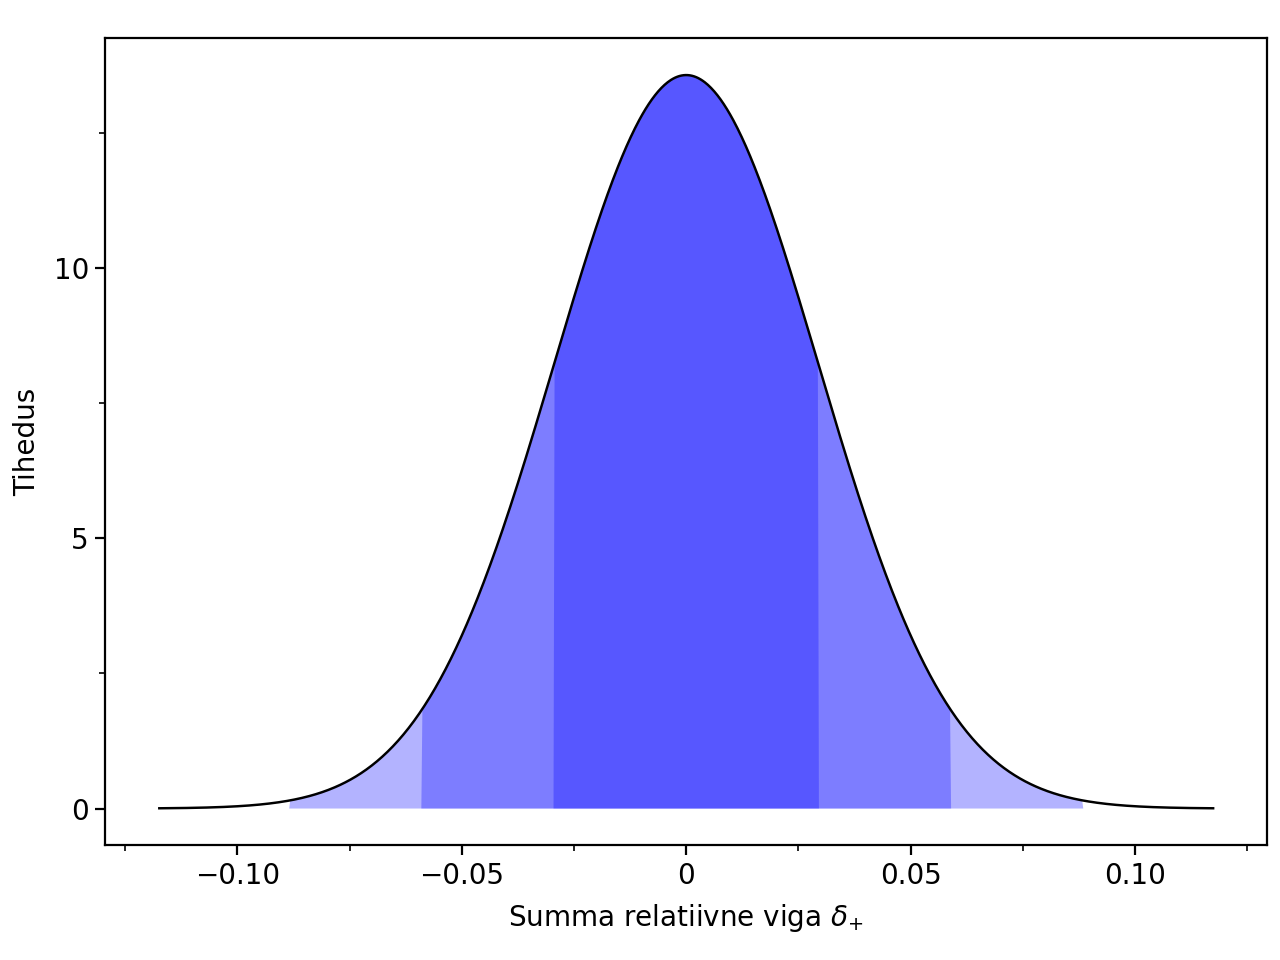

<Figure Size: (640 x 480)>

In [3]:
x0 = .8
y0 = .9

sx = .04
sy = .03
sdelta = np.sqrt((sx ** 2 + sy ** 2) / (x0 + y0) ** 2)

x = np.linspace(-4 * sdelta, 4 * sdelta, 1000)
tihedus = norm.pdf(x, 0, sdelta)
df = pd.DataFrame({'x': x, 'y': tihedus})

g = (
    ggplot(df) +
    theme_matplotlib() +
    aes('x', 'y') +
    labs(x='Summa relatiivne viga $\\delta_{+}$', y='Tihedus') +
    
    geom_area(aes(where='np.logical_and(-sdelta < x, x < sdelta)'), fill="blue", alpha=.3) +
    geom_area(aes(where='np.logical_and(-2 * sdelta < x, x < 2 * sdelta)'), fill="blue", alpha=.3) +
    geom_area(aes(where='np.logical_and(-3 * sdelta < x, x < 3 * sdelta)'), fill="blue", alpha=.3) +
    geom_line()
)
# g.save(joonised_kaust + 'summa_relatiivne_viga.png', dpi=100)
g

Kuna veakomponentide $\varepsilon_x$ ja $\varepsilon_y$ puhul eeldame normaaljaotust, saame normaaljaotuse omadusi kasutades arvutada, mis tõenäosusega viga $\delta_{+}$ või $\delta_{-}$ mingisse vahemikku jääb. Näiteks täpsete väärtuste $x_0 = 0{,}8$, $y_0 = 0{,}9$ ning absoluutsete vigage $\varepsilon_x \sim \mathcal{N}(0; 0{,}04)$, $\varepsilon_y \sim \mathcal{N}(0; 0{,}03)$ korral jääb $x + y$ relatiivne viga tõenäosusega ligikaudu $68\%$ vahemikku $\pm 0{,}029$. Joonisel on antud näite korral summa $x + y$ relatiivse vea tihedus. Helesiniselt märgitud alad tähistavad standardhälbe täisarvkordseid vahemikke keskväärtuse ümber.

### Korrutise relatiivse vea omadus
Mõnikord võib lähendatav suurus olla leitav ligikaudsete arvude korrutisena. Näiteks riskülikukujulise põranda pindala leidmiseks peame korrutama põranda laiuse ja pikkuse, mis mõõtemääramatuse või vigase mõõteriista tõttu ei pruugi olla täpsed.

Olgu $x$ ja $y$ ligikaudsed väärtused arvudest $x_0$ ja $y_0$ absoluutsete vigadega vastavalt $\varepsilon_x$ ning $\varepsilon_y$:
\begin{align*}
    x &= x_0 + \varepsilon_x ,\qquad \varepsilon_x \sim \mathcal{N}(0, \sigma_x) \enspace,\\
    y &= y_0 + \varepsilon_y ,\qquad \varepsilon_y \sim \mathcal{N}(0, \sigma_y) \enspace,
\end{align*}
kus vead $\varepsilon_x$ ja $\varepsilon_y$ on sõltumatud. Suuruste $x$ ja $y$ korrutise relatiivne viga avaldub kujul
\begin{align*}
    \delta &= \frac{x \cdot y - x_0 \cdot y_0}{x_0 \cdot y_0} = \frac{(x_0 + \varepsilon_x) \cdot (y_0 + \varepsilon_y) - x_0 \cdot y_0}{x_0 \cdot y_0} \\
    &= \frac{x_0 \cdot \varepsilon_y + y_0 \cdot \varepsilon_x + \varepsilon_x \cdot \varepsilon_y}{x_0 \cdot y_0} = \frac{\varepsilon_y}{y_0} + \frac{\varepsilon_x}{x_0} + \frac{\varepsilon_x}{x_0} \cdot \frac{\varepsilon_y}{y_0} \enspace.
\end{align*}
Vigade $\varepsilon_x$ ja $\varepsilon_y$ sõltumatuse tõttu on $\delta$ keskväärtus null. Arvestades eelnevat saame tuletada korrutise relatiivse vea dispersiooni
\begin{align*}
    \variance{\delta} &= \mean{\delta^2} - \mean{\delta}^2 = \mean{\delta^2} - 0 \\
    &= \mean{\left( \frac{\varepsilon_y}{y_0} \right)^2 + \left( \frac{\varepsilon_x}{x_0} \right)^2 + \left( \frac{\varepsilon_x}{x_0} \cdot \frac{\varepsilon_y}{y_0} \right)^2 + 2\cdot \frac{\varepsilon_x \cdot \varepsilon_y}{x_0 \cdot y_0} + 2\cdot \frac{\varepsilon_x^2 \cdot \varepsilon_y}{x_0^2 \cdot y_0} + 2\cdot \frac{\varepsilon_x \cdot \varepsilon_y^2}{x_0 \cdot y_0^2}} \\
    &= \mean{\left( \frac{\varepsilon_y}{y_0} \right)^2 + \left( \frac{\varepsilon_x}{x_0} \right)^2 + \left( \frac{\varepsilon_x}{x_0} \cdot \frac{\varepsilon_y}{y_0} \right)^2} \\
    &= \variance{\frac{\varepsilon_y}{y_0}} + \variance{\frac{\varepsilon_x}{x_0}} + \variance{\frac{\varepsilon_y}{y_0}} \cdot \variance{\frac{\varepsilon_x}{x_0}} \enspace.
\end{align*}
Kui $x$ ja $y$ relatiivsete vigade dispersioonid on väikesed on nende korrutis veelgi väiksem. Sellisel juhul saame $\delta$ dispersiooni hinnata küllaltki täpselt, kui jätame korrutise arvutusest välja
\begin{equation}
    \label{eq:korrutise relatiivne viga dispersioon ligikaudne}
    \variance{\delta} \approx \variance{\frac{\varepsilon_y}{y_0}} + \variance{\frac{\varepsilon_x}{x_0}} \enspace.
\end{equation}

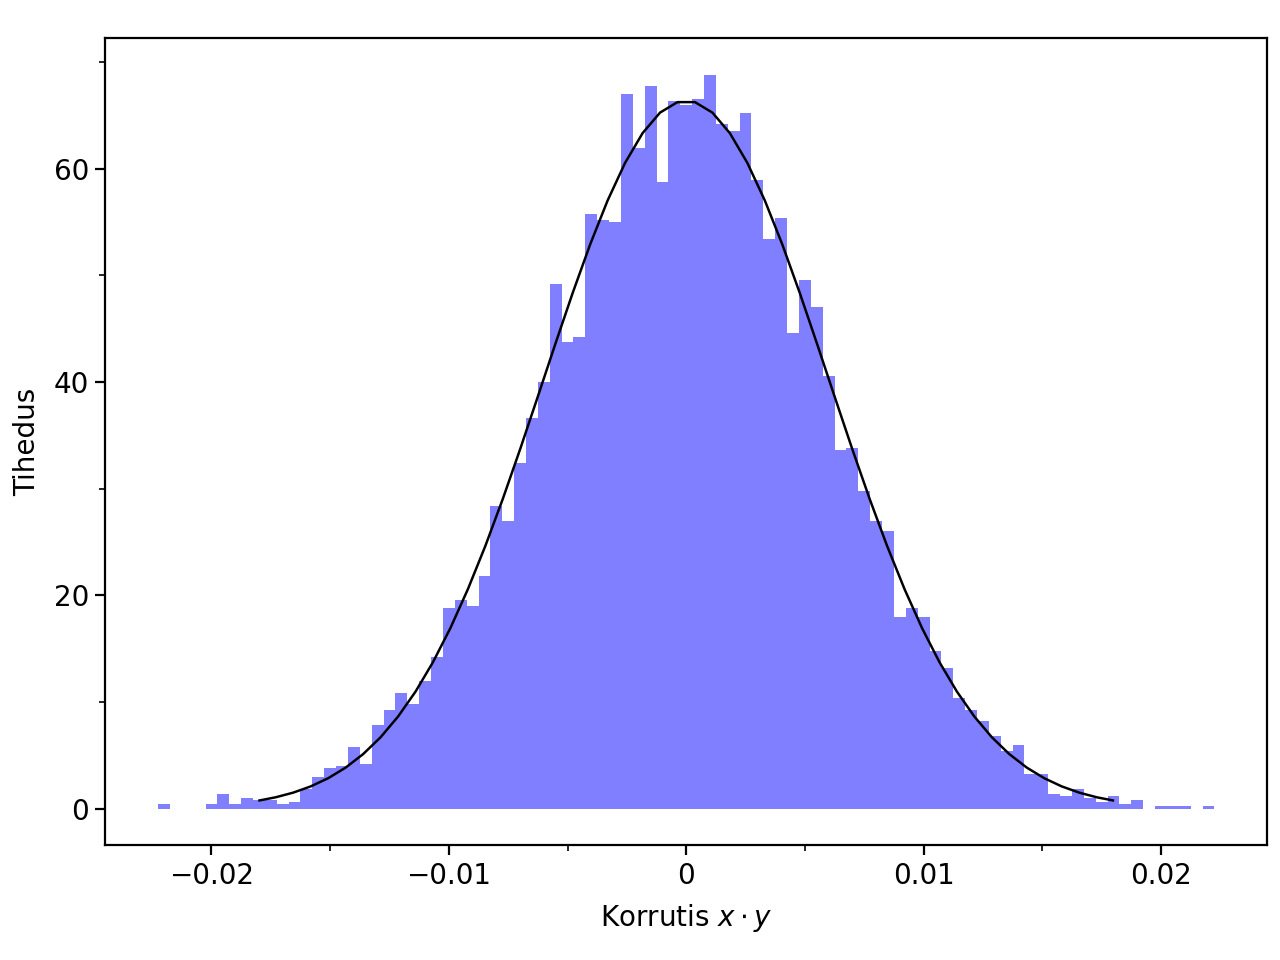

<Figure Size: (640 x 480)>

In [4]:
n = 10000
x0 = 0.8
y0 = 0.9

# indikaatorkeskmise absoluutse vea stdandardhälve
sx = np.sqrt((1 - x0) * x0 / n) 
sy = np.sqrt((1 - y0) * y0 / n)

x = norm.rvs(x0, sx, n)
y = norm.rvs(y0, sy, n)
dxy = (x * y) / (x0 * y0) - 1

varx = (sx / x0) ** 2
vary = (sy / y0) ** 2
sd = np.sqrt(varx + vary)

arvud = np.linspace(-3 * sd, 3 * sd)
tihedus = norm.pdf(arvud, 0, sd)

g = (
    ggplot() +
    theme_matplotlib() +
    aes(y=after_stat('density')) +
    labs(x='Korrutis $x \\cdot y$', y='Tihedus') +
    
    geom_histogram(aes(x='dxy'), binwidth=0.0005, alpha=0.5, fill="blue") +
    geom_line(aes('arvud', 'tihedus'))
)
# g.save(joonised_kaust + 'korrutis_relatiivne_viga.png', dpi=100)
g

Joonisel on histogrammina simuleeritud korrutise $x \cdot y$ relatiivne viga kümnetuhande juhusliku $x$ ja $y$ väärtuse korral, kus $x \sim \mathcal{N}(0{,}8; 0{,}004)$, $y \sim \mathcal{N}(0{,}9; 0{,}003)$. Tume joon on korrutise relatiivse vea lähendus normaaljaotusega tulemuse \eqref{eq:korrutise relatiivne viga dispersioon ligikaudne} põhjal.

### Jagatise relatiivse vea omadus
Ligikaudsete väärtuste jagatise puhul on vea edasikandumine keerulisem. Tehese mõned lihtsustavad eeldused saame leida piisavalt täpse hinnangu jagatise relatiivsele veale.

Olgu $x$ ja $y$ ligikaudsed väärtused arvudest $x_0$ ja $y_0$ absoluutsete vigadega vastavalt $\varepsilon_x$ ning $\varepsilon_y$:
\begin{align*}
    x &= x_0 + \varepsilon_x ,\qquad \varepsilon_x \sim \mathcal{N}(0, \sigma_x) \enspace,\\
    y &= y_0 + \varepsilon_y ,\qquad \varepsilon_y \sim \mathcal{N}(0, \sigma_y) \enspace,
\end{align*}
kus vead $\varepsilon_x$ ja $\varepsilon_y$ on sõltumatud. Suuruste $x$ ja $y$ jagatise relatiivne viga avaldub kujul
\begin{equation*}
    \delta = \left( \frac{x}{y} - \frac{x_0}{y_0} \right) \div \frac{x_0}{y_0} = \frac{x \cdot y_0}{y \cdot x_0} - 1 = \frac{y_0}{x_0} \cdot \frac{x_0 + \varepsilon_x}{y_0 + \varepsilon_y} - 1 \enspace.
\end{equation*}
Jagatise relatiivse vea dispersiooni leidmist saame taandada korrutise relatiivse vea dispersioonile, sest $x \div y = x \cdot y^{-1}$. Seega peame hindama $y$ pöördväärtuse relatiivse vea disperisooni
\begin{equation}
    \label{eq:1/y relatiivne viga dispersioon}
    \variance{\left( \frac{1}{y} - \frac{1}{y_0} \right) \div \frac{1}{y_0}} = \variance{\frac{y_0}{y}} = y_0^2 \cdot \variance{\frac{1}{y}} \enspace.
\end{equation}
Taylori arenduse põhjal saame esitada $y^{-1}$ ligikaudselt
\begin{equation*}
    \frac{1}{y} = \frac{1}{y_0 + \varepsilon_y} \approx \frac{1}{y_0} - \frac{1}{y_0^2} \cdot \varepsilon_y \enspace.
\end{equation*}
Tehes eelduse, et $y$ relatiivne viga on väike, on ka Taylori arenduse jääkliige väike.
Vahetulemuse põhjal
\begin{align}
    \variance{\frac{1}{y}}
    &\approx \variance{\frac{1}{y_0} - \frac{1}{y_0^2} \cdot \varepsilon_y} \nonumber \\
    &= \mean{\left( \frac{1}{y_0} - \frac{1}{y_0^2} \cdot \varepsilon_y \right)^2} - \mean{\frac{1}{y_0} - \frac{1}{y_0^2} \cdot \varepsilon_y}^2 \nonumber \\
    &= \frac{1}{y_0^2} + \frac{\sigma_y^2}{y_0^4} - \frac{1}{y_0^2} = \frac{\sigma_y^2}{y_0^4} \enspace. \label{eq:1/y ligikaudne dispersioon}
\end{align}
Tulemuste \eqref{eq:1/y relatiivne viga dispersioon} ja \eqref{eq:1/y ligikaudne dispersioon} põhjal saame avaldada $y^{-1}$ relatiivse vea ligikaudse dispersiooni
\begin{equation*}
    \variance{\left( \frac{1}{y} - \frac{1}{y_0} \right) \div \frac{1}{y_0}} \approx y_0^2 \cdot \frac{\sigma_y^2}{y_0^4} = \variance{\frac{\varepsilon_y}{y_0}} \enspace.
\end{equation*}
Seega väikese $y$ relatiivse vea korral on $x$ ja $y$ jagatise relatiivse vea dispersioon, ligikaudu võrdne korrutise omaga
\begin{equation}
    \label{eq:jagatis relatiivne viga dispersioon}
    \variance{\delta} \approx \variance{\frac{\varepsilon_x}{x_0}} + \variance{\frac{\varepsilon_y}{y_0}} + \variance{\frac{\varepsilon_x}{x_0}} \cdot \variance{\frac{\varepsilon_y}{y_0}} \approx \variance{\frac{\varepsilon_x}{x_0}} + \variance{\frac{\varepsilon_y}{y_0}} \enspace.
\end{equation}

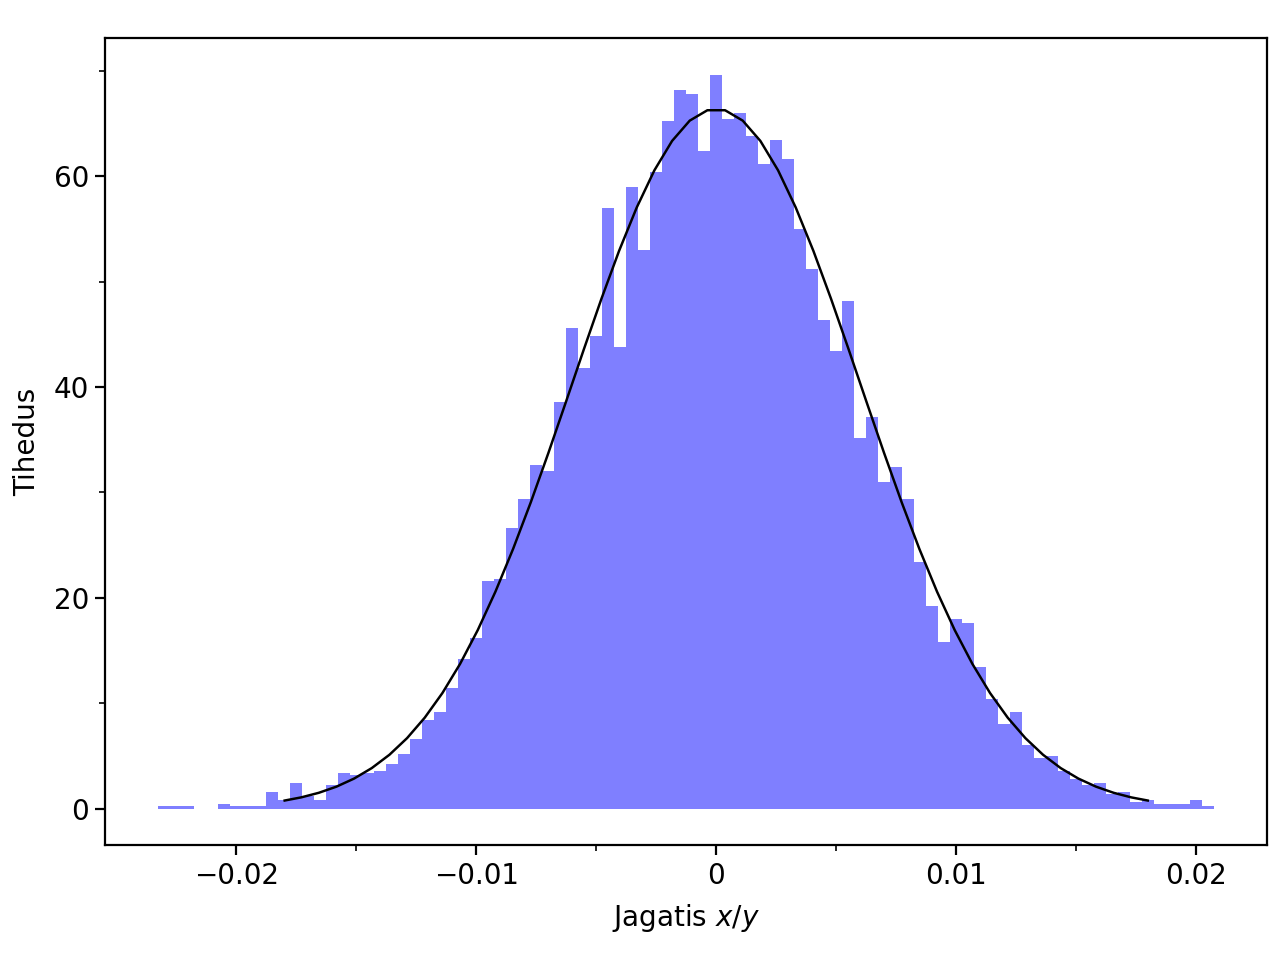

<Figure Size: (640 x 480)>

In [5]:
n = 10000
x0 = 0.8
y0 = 0.9

# indikaatorkeskmise absoluutse vea stdandardhälve
sx = np.sqrt((1 - x0) * x0 / n) 
sy = np.sqrt((1 - y0) * y0 / n)

x = norm.rvs(x0, sx, n)
y = norm.rvs(y0, sy, n)
dxy = (x / y) / (x0 / y0) - 1


varx = (sx / x0) ** 2
vary = (sy / y0) ** 2
sd_ligikaudu = np.sqrt(varx + vary)

arvud = np.linspace(-3 * sd_ligikaudu, 3 * sd_ligikaudu)
tihedus = norm.pdf(arvud, 0, sd_ligikaudu)

g = (
    ggplot() +
    theme_matplotlib() +
    aes(y=after_stat('density')) +
    labs(x='Jagatis $x/y$', y='Tihedus') +
    
    geom_histogram(aes(x='dxy'), binwidth=0.0005, alpha=0.5, fill="blue") +
    geom_line(aes('arvud', 'tihedus'))
)
# g.save(joonised_kaust + 'jagatis_relatiivne_viga.png', dpi=100)
g

Joonisel on histogrammina simuleeritud jagatise $x \div y$ relatiivne viga kümnetuhande juhuslikult genereeritud $x$ ja $y$ väärtuse puhul, kus $x \sim \mathcal{N}(0{,}8; 0{,}004)$ ning $y \sim \mathcal{N}(0{,}9; 0{,}003)$. Tume joon on  relatiivse vea lähendus normaaljaotusega tulemuse \eqref{eq:jagatis relatiivne viga dispersioon} põhjal.